## Play-ground to make initial data distributions.

In [2]:
#import Pkg; Pkg.add("FileIO")
using Distributions
using Plots
using FileIO
using JLD2
using LaTeXStrings
#Pkg.instantiate()

In [3]:
include("inidat_aux_functions.jl")

f_x_max (generic function with 1 method)

In [4]:
N = 40_000
v = zeros(N)
vb = 5
for i in 1:N
    v[i] = distribution_stream(vb)
end

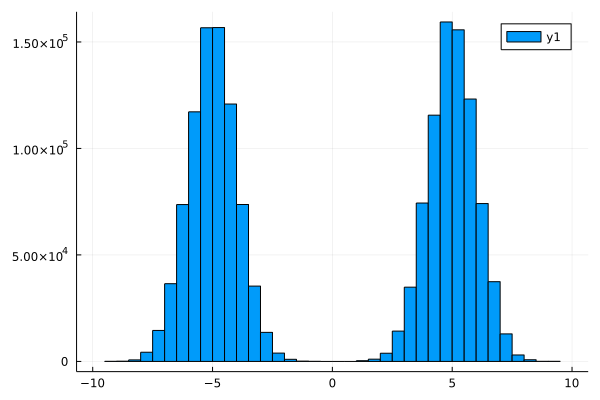

In [5]:
histogram(v, bins=:scott, weights=repeat(1:80, outer=500))

At first sigth they look very similar....

We now make and save some distributions to use as standard ones.

## Thermal Distributions

$$
f(x,v) = \frac{N}{L} \frac{1}{\sqrt{2\pi \theta}} e^{-\frac{v^2}{2\theta}}
$$

Thus, $\theta = \sigma^2$ is the variance of the distribution.

### Relativistic version

$$
f(x,p) = \frac{N}{L} \frac{1}{\sqrt{2\pi \theta}} e^{\frac{1 - \sqrt{1+\frac{p^2}{m^2}}}{2\theta}}
$$

In [6]:
#save("Initial_Distributions/par_dis_L5_N8_5_theta01.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta001.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta0001.jld2", "par_dis", u)
#save("Initial_Distributions/par_dis_L5_N2_5_theta00001.jld2", "par_dis", u)


## Landau Damping ##

The initial distribution is: 

$$
f(x,v,\alpha, k, \theta) = \frac{1}{\sqrt{2\pi \theta}} e^{-\frac{v^2}{2\theta}} (1 + \alpha cos(kx) )
$$

Since it is a product we can split into two distributions one for the position and one for the velocity.
The one for the velocity we already have, so we need to make only the random sampling of the spatial one. 

Some definitions $\hat{k} = k / k_D = k * \sqrt{\theta}$ Or $k = \hat{k} / \sqrt{\theta}$ 

In these simulations, $\theta = 10^{-3}$ $\sqrt{\theta} = 0.03162$

Thus to $\hat{k} = 0.01$ corresponds a $\lambda = 2\pi * \sqrt{\theta} / \hat{k} = 19.869$

For $\hat{k} = 0.40$ corresponds a $\lambda = 0.497$

For the first case an $L = 2 \lambda = 39.738$ is used and $J = 1761*2 = 3522$, $dx = L/J = 0.0112$

For the second $L=15*\lambda = 7.455$ is used and $J = 62 * 15 = 930$, $dx = 0.0080$

### Relativistic version

For the relativistic version we use the distribution (for momentum)

$$
f(p) = \frac{1}{4\pi m^3 c^3 \theta K^2(1/\theta)} e^{(1-\gamma) / \theta} \;\;\;\; \gamma = \sqrt{1+p^2}
$$

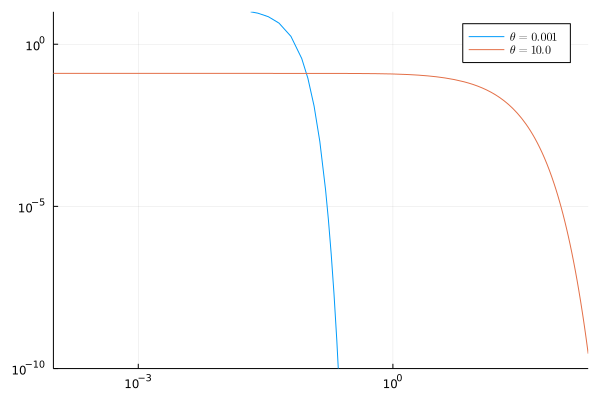

In [7]:
Plots.plot(u -> f_p_rel(u,(0.001,1))
, xscale=:log10, yscale=:log10, xlim=(0.0001,1), ylim=(1e-10,1e1)
, label=L"\theta = 0.001")
Plots.plot!(u -> f_p_rel(u,(10.,1))
, xscale=:log10, yscale=:log10, xlim=(0.0001,200)
, label=L"\theta = 10.0")

In [5]:
damped = false
undamped_s = false
undamped_l = false
vlasov_exp_200 = false
vlasov_exp_40 = false
damped = true
#undamped_s = true

#vlasov_exp_200 = true
#vlasov_exp_40 = true

N_exp = 6
N = 8*10^(N_exp)

data_name = "par_dis_landau_norm_norel_"

if undamped_l
    L= 39.738 
    #m = 20 # 
    m = 2
    data_name = data_name * "undamped_l_$(m)_"
elseif undamped_s
    L= 4 
    #m = 20 # 
    m = 2 # this corresponds to a k approx 0.1
    data_name = data_name * "undamped_s_$(m)_"
elseif damped
    L = 7.455
    m = 15 # 12, 15, 19
    data_name = data_name * "damped_$(m)_"
elseif vlasov_exp_200
    L = 200.
    #m = 2
    m = 10
    data_name = data_name * "vla_200_$(m)_"
elseif vlasov_exp_40
    L = 40.
    m = 2
    data_name = data_name * "vla_40_$(m)_"
end


k = 2π*m/L # this here is k, not \hat{k}
alpha_exp = 2
α = 10.0^(-alpha_exp) # 0.1 0.001

exp_Theta = 3
θ = 10.0^(-exp_Theta)

interval_x = (0.0,L)
p_max = sqrt((1+10*θ)^2-1) 
interval_p = (0, p_max) # we then antisymmetrize to get the negative values.
par_f_x = (α, m, L)
par_f_p_1 = (θ,1) #to compute the norm of f_p
par_init = (N,)
norm = norm_f_p_rel(f_p_rel,par_f_p_1,20000,p_max)
par_f_p = (θ,norm)

data_name = data_name * "alp$(alpha_exp)_8$(N_exp)_Th$(exp_Theta)"

#build_initial_data(data_name::String, par_init, f_x, f_x_max, par_f_x, interval_x, f_p_rel, f_p_rel_max, par_f_p, interval_p);
build_initial_data(data_name::String, par_init, f_x, f_x_max, par_f_x, interval_x, f_p, f_p_max, par_f_p, interval_p);

In [4]:
par_dis, run_name, pars, par_f_x, par_f_p = retrieve_initial_data("Initial_Distributions/" * data_name * ".jld2")

@show run_name, pars, par_f_x, par_f_p

(run_name, pars, par_f_x, par_f_p) = ("par_dis_landau_norm_norel_damped_15_alp2_86_Th3", (8000000,), (0.010000000000000002, 15, 7.455), (0.001, 1.0003670751902618))


("par_dis_landau_norm_norel_damped_15_alp2_86_Th3", (8000000,), (0.010000000000000002, 15, 7.455), (0.001, 1.0003670751902618))

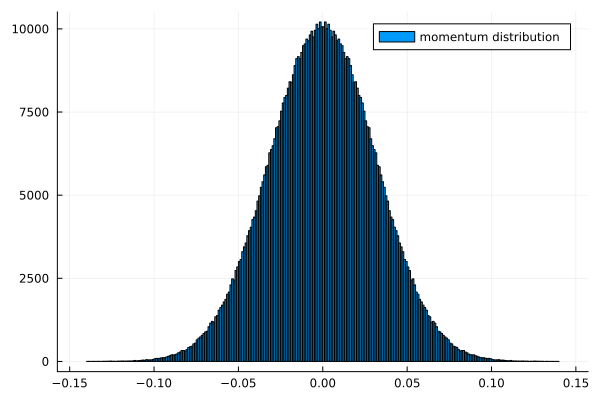

In [5]:
histogram(par_dis[N+1:2N], label="momentum distribution")

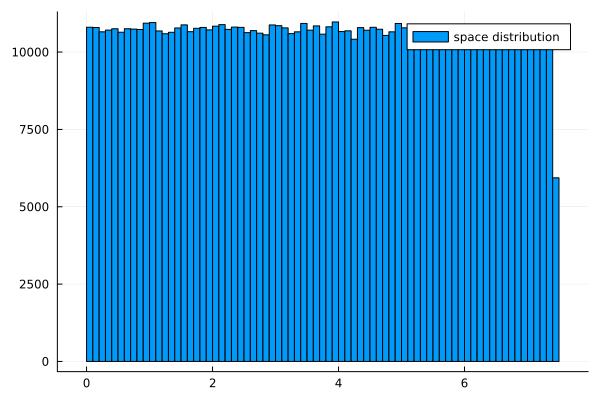

In [11]:
histogram(par_dis[1:N], label="space distribution")

In [1]:
## 2D Distributions